# U.S. Medical Insurance Costs

The U.S. health insurance market has been a divisive point in American Politics in the last decade. The bipolarity of public opinion was showacased with the rise and fall of the Obama Care program, which tried to close the health gap in the country.

By looking at countless storys of american patients, it is possible to notice the financial dificculties faced to access healthcare, and how unequal the access can be.

This analysis focuses on trying to find efficient questions to analyse how different characteristics of a person can influence the cost paid for medical care in the United States.

*It is important to mention that the database is not composed of real and updated numbers. Moreover it does not necessarily represents reallity.*

The questions we are going to be trying to answer are:
- [Is there a difference between how many women or man have insurance?](#how-different-the-cost-of-insurance-is-for-each-sex?)
- [How age affects the insurance cost?](#how-age-affects-insurance-cost)
- [Which is the best and worst case scenario?](#the-best-and-worst-case-scenario)
- [Do children impact women or man more?](#do-children-affect-men-or-women-more)
- [Costs of insurance per region](#analysing-the-charges-difference-between-regions)
- [The cost of being a smoker](#the-cost-of-being-a-smoker)

## Creating base code

In [140]:
#Creatingh the arrays tat are going to represent the columns
age=[]
sex=[]
bmi=[]
children=[]
smoker=[]
region=[]
charges=[]
#Importing the database
import csv
from matplotlib import pyplot as plt
import numpy as np
#importing csv information
with open('insurance.csv') as base:
    reader=csv.DictReader(base)
    for row in reader:
        age.append(row['age'])
        sex.append(row['sex'])
        bmi.append(row['bmi'])
        children.append(row['children'])
        smoker.append(row['smoker'])
        region.append(row['region'])
        charges.append(row['charges'])
    

**Creating functions to calculate each proposed analysis**


In [141]:
#Function to compare the cost for the two sexs
def getchargesPersex():
    sF=0
    lF=0
    sM=0
    lM=0
    for i in range(len(sex)):
        if sex[i]=='female':
            sF+=float(charges[i])
            lF+=1
        elif sex[i]=='male':
            sM+=float(charges[i])
            lM+=1
    #Finding average prices
    avgF=sF/lF
    avgM=sM/lM
    print("Female average:"+str(avgF))
    print("Male average:"+str(avgM))
    #Ploting the graphs
    arr=[avgM,avgF]
    tab=['Male','Female']
    fig, ax=plt.subplots()
    ax.bar([0.0,0.4],arr,width=0.3,color=("blue","pink"),edgecolor="white")
    plt.xticks([0.0,0.4],tab)
    plt.show()
    ax.set

#Function to plot a graph of how age infleunces the charges
def getAgeAffectingCost():
    unique=np.unique(np.array(age))
    mat=[]
    for i in range(len(unique)):
        a=[]
        for j in range(len(age)):
            if age[j]==unique[i]:
                a.append(float(charges[j]))
        mat.append(a)
    # make data
    avgs=[sum(mat[i])/len(mat) for i in range(len(unique))]
    x = np.linspace(0, 8, 16)
    y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
    y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

    # plot
    fig, ax = plt.subplots()

    ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
    ax.plot(x, (y1 + y2)/2, linewidth=2)

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
        ylim=(0, 8), yticks=np.arange(1, 8))
    avgs=[sum(mat[i])/len(mat) for i in range(len(unique))]
    plt.figure(figsize=(12,2))
    plt.plot(unique,avgs)
    
#Getting the best case scenarion(the person who pays the least)
def getMin():
    minimo=0
    r=[]
    for i in range(len(charges)):
        if charges[i]<charges[minimo]:
            minimo=i

    r.append(age[minimo])
    r.append(sex[minimo])
    r.append(bmi[minimo])
    r.append(children[minimo])
    r.append(smoker[minimo])
    r.append(region[minimo])
    r.append(charges[minimo])
    return r

#Getting the worst case scenario (the person who pays the most)
def getMax():
    maximo=0
    r=[]
    for i in range(len(charges)):
        if charges[i]>charges[maximo]:
            maximo=i

    r.append(age[maximo])
    r.append(sex[maximo])
    r.append(bmi[maximo])
    r.append(children[maximo])
    r.append(smoker[maximo])
    r.append(region[maximo])
    r.append(charges[maximo])
    return r

#Function to get the cost man have with a incresing number of children
def getChildMen():
    has_zero=[]
    has_one=[]
    has_two=[]
    has_three=[]
    has_four=[]

    for i in range(len(children)):
        if sex[i]=='male':
            if float(children[i])==0:
                has_zero.append(float(charges[i]))
            elif float(children[i])==1:
                has_one.append(float(charges[i]))
            elif float(children[i])==2:
                has_two.append(float(charges[i]))
            elif float(children[i])==3:
                has_three.append(float(charges[i]))
            elif float(children[i])==4:
                has_four.append(float(charges[i]))

    avgs=[]
    avgs.append(sum(has_zero)/len(has_zero))
    avgs.append(sum(has_one)/len(has_one))
    avgs.append(sum(has_two)/len(has_two))
    avgs.append(sum(has_three)/len(has_three))
    avgs.append(sum(has_four)/len(has_four))
    #Plotting the graph
    xAxis=[0,1,2,3,4]
    plt.plot(xAxis,avgs)
    plt.title("Cost fo insurance per children for man")
    plt.show()

#Function to get the cost man have with a incresing number of children
def getChildWom():
    has_zero=[]
    has_one=[]
    has_two=[]
    has_three=[]
    has_four=[]

    for i in range(len(children)):
        if sex[i]=='female':
            if float(children[i])==0:
                has_zero.append(float(charges[i]))
            elif float(children[i])==1:
                has_one.append(float(charges[i]))
            elif float(children[i])==2:
                has_two.append(float(charges[i]))
            elif float(children[i])==3:
                has_three.append(float(charges[i]))
            elif float(children[i])==4:
                has_four.append(float(charges[i]))

    avgs=[]
    avgs.append(sum(has_zero)/len(has_zero))
    avgs.append(sum(has_one)/len(has_one))
    avgs.append(sum(has_two)/len(has_two))
    avgs.append(sum(has_three)/len(has_three))
    avgs.append(sum(has_four)/len(has_four))
    #Plotting the graphs
    xAxis=[0,1,2,3,4]
    plt.plot(xAxis,avgs)
    plt.title("Cost fo insurance per children for woman")
    plt.show()

#Function to get how the average cost of insurance changes per region
def getInsurancePerRegion():
    arrNortheast=[float(charges[i]) for i in range(len(region)) if region[i]=='northeast']
    arrNorthwest=[float(charges[i]) for i in range(len(region)) if region[i]=='northwest']
    arrSoutheast=[float(charges[i]) for i in range(len(region)) if region[i]=='southeast']
    arrSouthwest=[float(charges[i]) for i in range(len(region)) if region[i]=='southwest']
    avgNorthEast=sum(arrNortheast)/len(arrNortheast)
    avgNorthwest=sum(arrNorthwest)/len(arrNorthwest)
    avgSoutheast=sum(arrSoutheast)/len(arrSoutheast)
    avgSouthwest=sum(arrSouthwest)/len(arrSouthwest)
    #Plotting the graph
    yAxis=[avgNorthEast,avgNorthwest,avgSoutheast,avgSouthwest]
    xAxis=["North East","North West", "South East", "South West"]
    plt.bar(xAxis,yAxis)
    plt.axhline(sum(yAxis)/len(yAxis), color='red', ls='dotted')
    plt.title("Average insurance charges per region of U.S.")

#Function to get the influence of smoking in insurance cost
def getSmokerCost():
    isSmoker=[float(charges[i]) for i in range(len(smoker)) if smoker[i]=='yes']
    notSmoker=[float(charges[i]) for i in range(len(smoker)) if smoker[i]=='no']
    avgSmoker=sum(isSmoker)/len(notSmoker)
    avgNotSmoker=sum(notSmoker)/len(notSmoker)
    
    #Plotting the graph
    xAxis=['Smokers', 'Not Smoker']
    yAxis=[avgSmoker,avgNotSmoker]
    plt.bar(xAxis,yAxis)
    plt.axhline(sum(yAxis)/len(yAxis),color='red',ls='dotted')
    plt.title("The cost of being a smoker in the U.S.")


## How different the cost of insurance is for each sex?


Female average:12569.57884383534
Male average:13956.751177721886


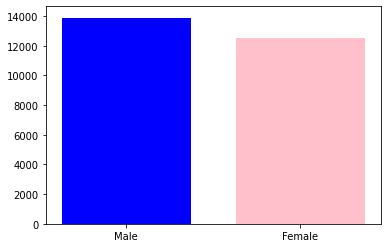

In [142]:
#Calling the function
getchargesPersex()

In the graph above it is possible to conclude that males pay $1400 more then females. Some of the most common topics cited by scientific literature that come up with hypothesis that explain this conclusion are:

- A higher statitical predespostion for having cancer and dying because fo it (https://www.sciencedirect.com/science/article/pii/S1569905610000485)

- A higher indicator of homicidal violence, which is a particularly stronger factor among racial minorities in the U.S.(https://www.ajol.info/index.php/sacq/article/view/101465)

- A higher risk of premature suicide (https://link.springer.com/article/10.1007/s00406-003-0397-6)

## How age affects insurance cost

None


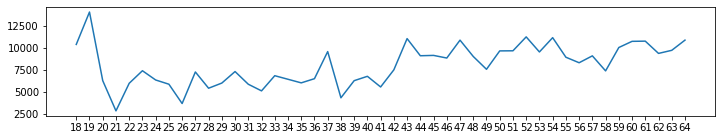

In [143]:
print(getAgeAffectingCost())

By looking at the graph above, it is possible to notice that he charges for younger people in the U.S. skyrocket in the 2 early year of adulthood. Some explanations for this factor can also be correlated by the articles show in the previous topics, which indicates that in this age there is a higher risk of dying due to external influences.

As we go ahead in the age range, it is noticible that the average of insurance charges are particularly higher beteween the gap of 43 to 64 years old. Hypothesis that explain this factor usually involve the higher risk of developing cancer and heart deseases during this age (https://link.springer.com/article/10.1007/s00246-014-0884-8)

## The best and worst case scenario



In [144]:
print("The best case is:")
print("age,sex,bmi,children,smoker,region,charges")
print(getMin())

print("\n The worst case is:")
print("age,sex,bmi,children,smoker,region,charges")
print(getMax())

The best case is:
age,sex,bmi,children,smoker,region,charges
['48', 'female', '32.3', '2', 'no', 'northeast', '10043.249']

 The worst case is:
age,sex,bmi,children,smoker,region,charges
['52', 'female', '18.335', '0', 'no', 'northwest', '9991.03765']


We can see that the difference beteween the two cases is more related to BMI differences. The BMI indicator is an important factor to analyse someone's health since having a higher BMI indicates obesity and related ilness such as diabetes, cancer and depression.

## Do children affect men or women more?


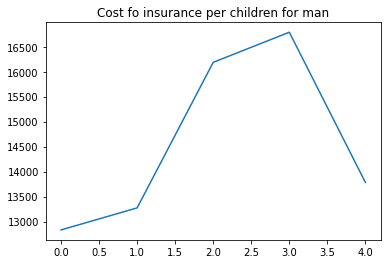

None


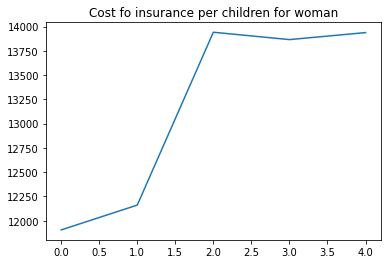

None


In [145]:
print(getChildMen())
print(getChildWom())

It is common sense that in most cases children will affect women and men's lifes in different ways, wich is noticible in the graph above. unfortunatelly do to margin of error differences it is not possible to fingd a conclusive answer around this question.

## Analysing the charges difference between regions


None


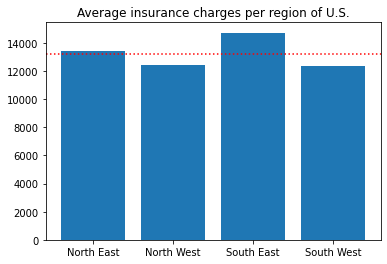

In [146]:
print(getInsurancePerRegion())

As presented in the graph above, the only region that has a significant cost difference from others is the Southeast of U.S.

## The cost of being a smoker


None


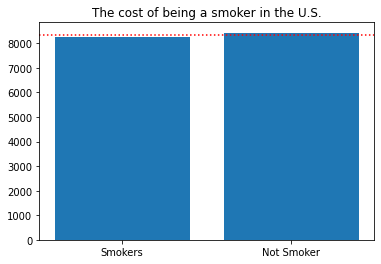

In [147]:
print(getSmokerCost())

Since it is directly associated with a much higher risk of developing cancer (as shown in this article https://jamanetwork.com/journals/jama/article-abstract/192974), logically it should be charged more. Surprisingly smoking does not affect health insurance costs based on the data analysed 

# Conclusion

As discussed in the previous questionaments it is possible to conclude that in the scenario presented in this database the two most influent factors when it comes to insurance charges are sex, age, and BMI.